In [8]:
import numpy as np
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [9]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
fnames = get_image_files(path/"images")

In [13]:
def label_func(fn): 
    """"""
    return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [14]:
loaders = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes
)

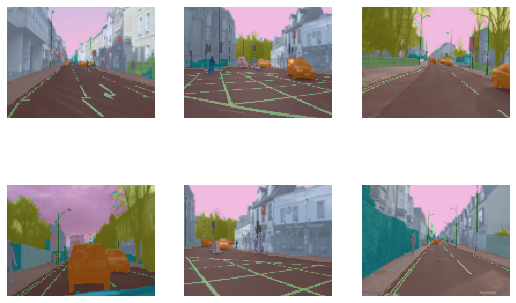

In [17]:
loaders.show_batch(max_n=6)

In [20]:
learn = unet_learner(loaders, resnet34)

In [21]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.840693,2.324670,00:40


epoch,train_loss,valid_loss,time
0,1.833098,1.388318,00:44
1,1.578253,1.203345,00:46
2,1.442152,1.123977,00:45
3,1.311040,0.905359,00:47
4,1.180957,0.832904,00:44
5,1.066300,0.768358,00:46
6,0.970132,0.722612,00:45
7,0.895783,0.722053,00:45


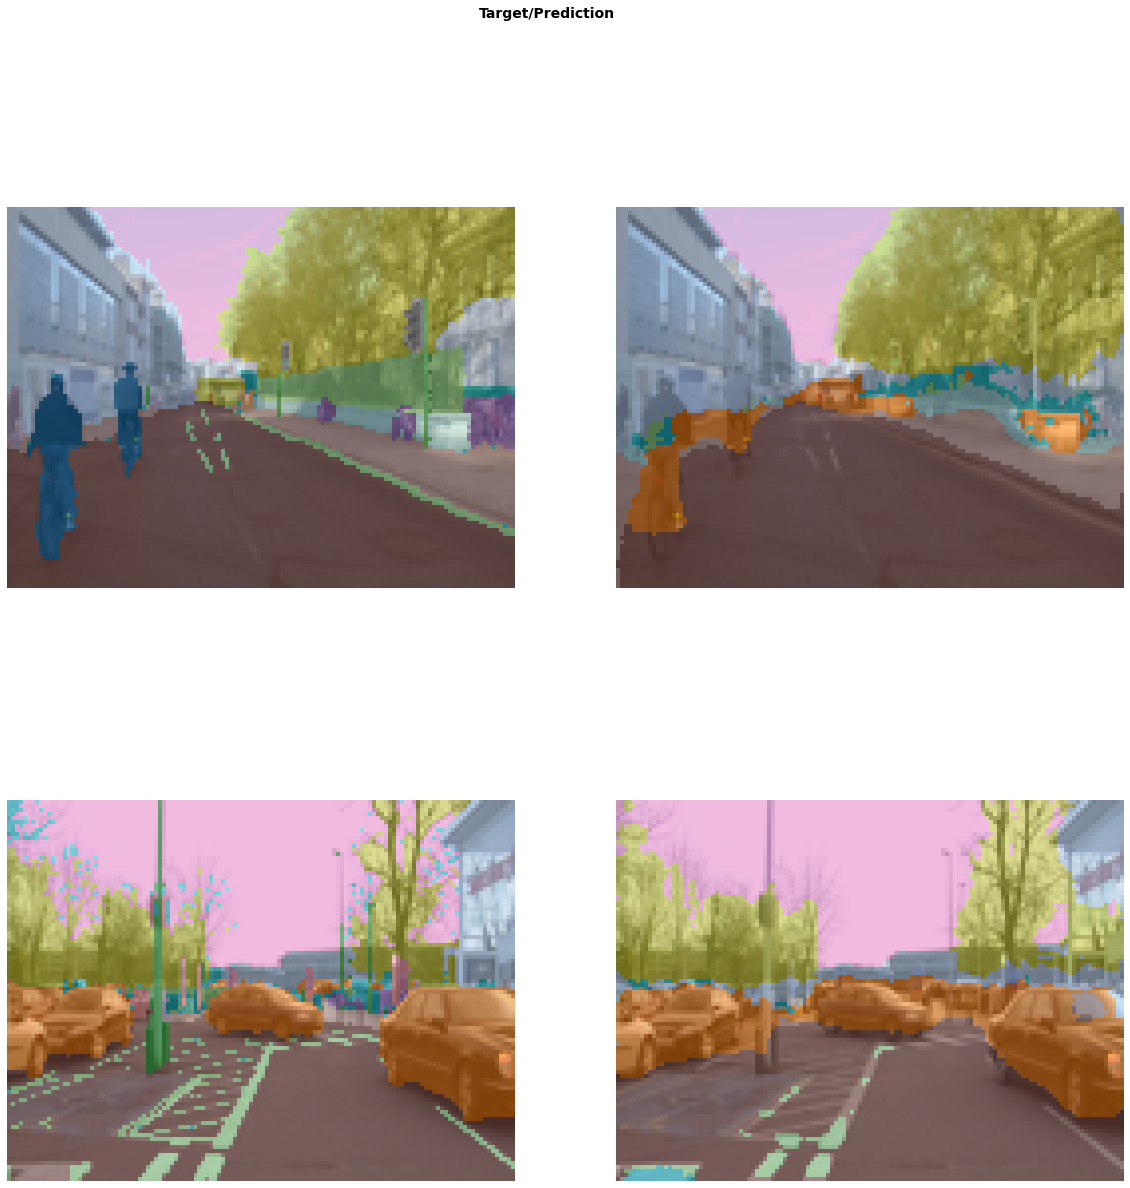

In [24]:
learn.show_results(max_n=6, figsize=(20,20))